In [1]:
# Importing important libraries that are going to be used and giving them a nick name
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Converting dataset into a pandas dataframe and printing first five rows of the dataframe
data_frame = pd.read_csv("bank-additional-full.csv", sep=";")
data_frame.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Importing another important library
from sklearn.feature_extraction import DictVectorizer

In [4]:
# Converting the pandas dataframe to a dictionary
data_dict = data_frame.T.to_dict().values()

In [5]:
# Assigning the library to a variable 
dv = DictVectorizer()

### Transforming text based classified features to one hot encoded features

In [6]:
# Converting the dictionary to a array
data_array = dv.fit_transform(data_dict).toarray()

# Assigning the variable with the name of the features
data_features = dv.get_feature_names()

In [7]:
# Creating a new pandas dataframe and printing its first five rows
data_frame2 = pd.DataFrame(data_array, columns=data_features)
data_frame2.head()

,age,campaign,cons.conf.idx,cons.price.idx,contact=cellular,contact=telephone,day_of_week=fri,day_of_week=mon,day_of_week=thu,day_of_week=tue,...,month=oct,month=sep,nr.employed,pdays,poutcome=failure,poutcome=nonexistent,poutcome=success,previous,y=no,y=yes
0,56.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
1,57.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
3,40.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
4,56.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0


### Computation of Feature Importance

In [8]:
# Importing few more libraries
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

In [9]:
# Converting the dataframe object to a NumPy array to achieve faster computation.
x = data_array[:, :-2]
x = np.hstack((x[:, :14], x[:, 15:]))
y = data_array[:, -1]

In [10]:
# Creating a forest to compute the feature importance
forest = RandomForestClassifier(n_estimators=250, random_state=7)

forest.fit(x, y)
importance = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importance)[::-1]

In [11]:
# Printing the feature importances
print("Feature Importances:")

for i in range(x.shape[1]):
    print("{:d} feature {:s} ({:f})".format(i+1, data_features[indices[i]], importance[indices[i]]))

Feature Importances:
1 feature age (0.163476)
2 feature emp.var.rate (0.116798)
3 feature campaign (0.084587)
4 feature month=sep (0.052677)
5 feature nr.employed (0.033459)
6 feature cons.conf.idx (0.025719)
7 feature poutcome=nonexistent (0.023575)
8 feature cons.price.idx (0.022730)
9 feature euribor3m (0.021330)
10 feature housing=unknown (0.020919)
11 feature education=unknown (0.019749)
12 feature housing=yes (0.017830)
13 feature marital=divorced (0.016699)
14 feature education=basic.9y (0.016249)
15 feature education=professional.course (0.016173)
16 feature poutcome=success (0.015555)
17 feature marital=married (0.014895)
18 feature day_of_week=mon (0.014303)
19 feature day_of_week=wed (0.014159)
20 feature job=student (0.014124)
21 feature day_of_week=thu (0.014124)
22 feature day_of_week=tue (0.013909)
23 feature job=unknown (0.013897)
24 feature loan=unknown (0.013725)
25 feature day_of_week=fri (0.013447)
26 feature education=illiterate (0.011668)
27 feature job=admin. (0.

### Plotting of data of most important features

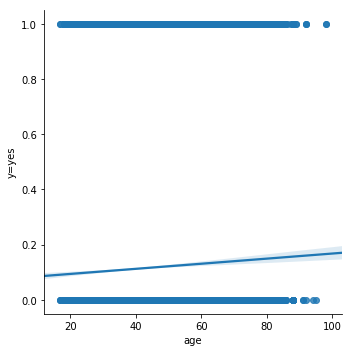

In [12]:
# Plotting a lmplot of "age of the customer" vs "y=yes"
sns.lmplot(x="age", y="y=yes", data=data_frame2)

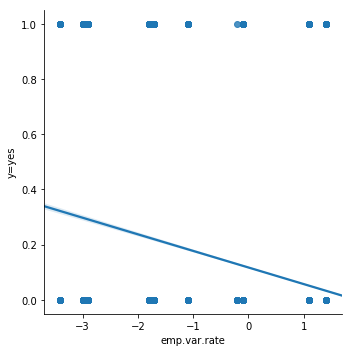

In [13]:
# Plotting a lmplot of "employment variation rate" vs "y=yes"
sns.lmplot(x="emp.var.rate", y="y=yes", data=data_frame2)

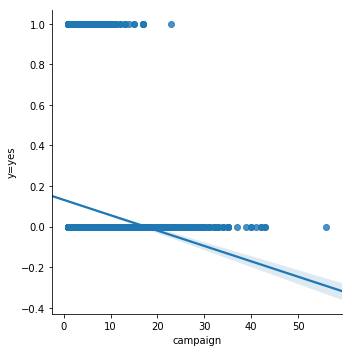

In [14]:
# Plotting a lmplot of "number of contacts performed" vs "y=yes"
sns.lmplot(x="campaign", y="y=yes", data=data_frame2)

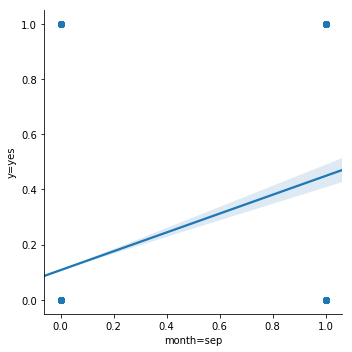

In [15]:
# Plotting a lmplot of "last conatct done in september" vs "y=yes"
sns.lmplot(x="month=sep", y="y=yes", data=data_frame2)

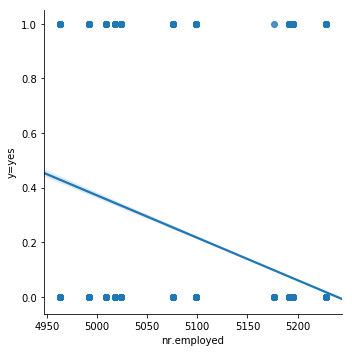

In [16]:
# Plotting a lmplot of "number of employees" vs "y=yes"
sns.lmplot(x="nr.employed", y="y=yes", data=data_frame2)

From the above graphs it is clear that campaigning more than 20 times to the same person and campaigning to person with age greater than 90 years is useless. Hence the above should be avoided.

### Optimization of Cost

In [17]:
# Calculation of total conversion ratio
conversion_ratio = sum(data_frame2["y=yes"])/sum(data_frame["campaign"])
print(conversion_ratio)

0.043875408967982296


In [18]:
# Calculation of Efficiency on every extra call made
num = 0.0
den = 0.0

for i in range(1,20):
    num = sum(data_frame2.loc[data_frame2["campaign"]==i]['y=yes'])
    den = float(data_frame2.loc[data_frame2["campaign"]>=i].shape[0])
    efficiency = num / den
    print("{:d} Call Eficiency = {:f}".format(i, efficiency))

1 Call Eficiency = 0.055842
2 Call Eficiency = 0.051431
3 Call Eficiency = 0.044236
4 Call Eficiency = 0.032613
5 Call Eficiency = 0.024077
6 Call Eficiency = 0.022157
7 Call Eficiency = 0.015794
8 Call Eficiency = 0.009567
9 Call Eficiency = 0.012346
10 Call Eficiency = 0.010969
11 Call Eficiency = 0.013809
12 Call Eficiency = 0.004335
13 Call Eficiency = 0.007055
14 Call Eficiency = 0.002105
15 Call Eficiency = 0.004926
16 Call Eficiency = 0.000000
17 Call Eficiency = 0.013158
18 Call Eficiency = 0.000000
19 Call Eficiency = 0.000000


Considering 2% as the minimum acceptable conversion ratio, hence every call made after the 6th call is considered as extra as the conversion ratio is less than 2%  

In [19]:
# Calculation of Efficiency on every extra call made to age group of 0-20 years
for i in range(1,20):
    num = float(data_frame2[(data_frame2['age']<=20) & (data_frame2['campaign']==i) & (data_frame2['y=yes']==1)].shape[0])
    den = 1+float(data_frame2[(data_frame2['age']<=20) & (data_frame2['campaign']>=i)].shape[0])
    efficiency = num / den
    print("{:d} Call Efficiency = {:f}".format(i, efficiency))

1 Call Efficiency = 0.241135
2 Call Efficiency = 0.160000
3 Call Efficiency = 0.135135
4 Call Efficiency = 0.181818
5 Call Efficiency = 0.222222
6 Call Efficiency = 0.000000
7 Call Efficiency = 0.000000
8 Call Efficiency = 0.000000
9 Call Efficiency = 0.000000
10 Call Efficiency = 0.000000
11 Call Efficiency = 0.000000
12 Call Efficiency = 0.000000
13 Call Efficiency = 0.000000
14 Call Efficiency = 0.000000
15 Call Efficiency = 0.000000
16 Call Efficiency = 0.000000
17 Call Efficiency = 0.000000
18 Call Efficiency = 0.000000
19 Call Efficiency = 0.000000


In [20]:
# Calculation of Efficiency on every extra call made to age group of 20-40 years
for i in range(1,20):
    num = float(data_frame2[(data_frame2['age']<=40) & (data_frame2["age"]>20) & (data_frame2['campaign']==i) & (data_frame2['y=yes']==1)].shape[0])
    den = 1+float(data_frame2[(data_frame2['age']<=40) & (data_frame2["age"]>20) & (data_frame2['campaign']>=i)].shape[0])
    efficiency = num / den
    print("{:d} Call Efficiency = {:f}".format(i, efficiency))

1 Call Efficiency = 0.055864
2 Call Efficiency = 0.050807
3 Call Efficiency = 0.046615
4 Call Efficiency = 0.032430
5 Call Efficiency = 0.025412
6 Call Efficiency = 0.023195
7 Call Efficiency = 0.014793
8 Call Efficiency = 0.008073
9 Call Efficiency = 0.012000
10 Call Efficiency = 0.010000
11 Call Efficiency = 0.014768
12 Call Efficiency = 0.005362
13 Call Efficiency = 0.010000
14 Call Efficiency = 0.000000
15 Call Efficiency = 0.004762
16 Call Efficiency = 0.000000
17 Call Efficiency = 0.006289
18 Call Efficiency = 0.000000
19 Call Efficiency = 0.000000


In [21]:
# Calculation of Efficiency on every extra call made to age group of 40-60 years
for i in range(1,20):
    num = float(data_frame2[(data_frame2['age']<=60) & (data_frame2["age"]>40) & (data_frame2['campaign']==i) & (data_frame2['y=yes']==1)].shape[0])
    den = 1+float(data_frame2[(data_frame2['age']<=60) & (data_frame2["age"]>40) & (data_frame2['campaign']>=i)].shape[0])
    efficiency = num / den
    print("{:d} Call Efficiency = {:f}".format(i, efficiency))

1 Call Efficiency = 0.043607
2 Call Efficiency = 0.042038
3 Call Efficiency = 0.034412
4 Call Efficiency = 0.026596
5 Call Efficiency = 0.019195
6 Call Efficiency = 0.018557
7 Call Efficiency = 0.013566
8 Call Efficiency = 0.010363
9 Call Efficiency = 0.012924
10 Call Efficiency = 0.012270
11 Call Efficiency = 0.010256
12 Call Efficiency = 0.003155
13 Call Efficiency = 0.003759
14 Call Efficiency = 0.004525
15 Call Efficiency = 0.005128
16 Call Efficiency = 0.000000
17 Call Efficiency = 0.020548
18 Call Efficiency = 0.000000
19 Call Efficiency = 0.000000


In [22]:
# Calculation of Efficiency on every extra call made to age group of 60-80 years
for i in range(1,20):
    num = float(data_frame2[(data_frame2['age']<=80) & (data_frame2["age"]>60) & (data_frame2['campaign']==i) & (data_frame2['y=yes']==1)].shape[0])
    den = 1+float(data_frame2[(data_frame2['age']<=80) & (data_frame2["age"]>60) & (data_frame2['campaign']>=i)].shape[0])
    efficiency = num / den
    print("{:d} Call Efficiency = {:f}".format(i, efficiency))

1 Call Efficiency = 0.243687
2 Call Efficiency = 0.258667
3 Call Efficiency = 0.194118
4 Call Efficiency = 0.217391
5 Call Efficiency = 0.121951
6 Call Efficiency = 0.076923
7 Call Efficiency = 0.157895
8 Call Efficiency = 0.066667
9 Call Efficiency = 0.000000
10 Call Efficiency = 0.000000
11 Call Efficiency = 0.166667
12 Call Efficiency = 0.000000
13 Call Efficiency = 0.000000
14 Call Efficiency = 0.000000
15 Call Efficiency = 0.000000
16 Call Efficiency = 0.000000
17 Call Efficiency = 0.000000
18 Call Efficiency = 0.000000
19 Call Efficiency = 0.000000


In [23]:
# Calculation of Efficiency on every extra call made to age group of greater than 80 years
for i in range(1,20):
    num = float(data_frame2[(data_frame2["age"]>80) & (data_frame2['campaign']==i) & (data_frame2['y=yes']==1)].shape[0])
    den = 1+float(data_frame2[(data_frame2["age"]>80) & (data_frame2['campaign']>=i)].shape[0])
    efficiency = num / den
    print("{:d} Call Efficiency = {:f}".format(i, efficiency))

1 Call Efficiency = 0.275000
2 Call Efficiency = 0.250000
3 Call Efficiency = 0.269231
4 Call Efficiency = 0.000000
5 Call Efficiency = 0.111111
6 Call Efficiency = 0.250000
7 Call Efficiency = 0.250000
8 Call Efficiency = 0.000000
9 Call Efficiency = 0.000000
10 Call Efficiency = 0.000000
11 Call Efficiency = 0.000000
12 Call Efficiency = 0.000000
13 Call Efficiency = 0.000000
14 Call Efficiency = 0.000000
15 Call Efficiency = 0.000000
16 Call Efficiency = 0.000000
17 Call Efficiency = 0.000000
18 Call Efficiency = 0.000000
19 Call Efficiency = 0.000000


In [24]:
# Calculation of total number of calls made
total_calls = sum(data_frame2['campaign'])

In [25]:
# Calculation of no. of extra calls made
extra_calls = sum(data_frame2[data_frame2['campaign']>6][data_frame2["age"]<90]['campaign'])
extra_calls -= 6*data_frame2[data_frame2['campaign']>6].shape[0]
print(extra_calls)

12040.0


c:\users\prince gada\anaconda_new\envs\dl\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [26]:
# Calculation of Percentage by which cost can be reduced
reduction_percent = 100*extra_calls/total_calls
print(reduction_percent)

11.384912154622993


In [27]:
# Calculation of total sales made
total_sales = float(data_frame2[data_frame2['y=yes']==1].shape[0])
print(total_sales)

4640.0


In [28]:
# Calculation of no. of sales achieved by making less than equal to 6 calls and calling people with age less than 90 years
less_costly_sales = float(data_frame2[(data_frame2['campaign']<=6) & (data_frame2["age"]<90) & (data_frame2['y=yes']==1)].shape[0])
print(less_costly_sales)

4524.0


In [29]:
# Calculation of Percentage of Sales at low cost
sales_percent = 100*less_costly_sales / total_sales
print(sales_percent)

97.5


## Result : 
### Not calling a person with age greater than 90 years and calling any person at maximum no of 6 times gives 97.5% sales with 11.38% redduction in cost